<a href="https://colab.research.google.com/github/DennisCG1993/sample/blob/main/Projeto_Marketing_grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação dos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U -q PyDrive
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Importando o dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'12S-RwoFMBHGC4cb235SGmi8nlyMRH0Xe'}) 
downloaded.GetContentFile('dataset.csv')  
df = pd.read_csv('dataset.csv',sep=';')

Tratamento dos dados

In [ ]:
y = pd.get_dummies(df['y'], columns ='y', drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_client = df.iloc[: , 0:7]

#Visualização

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df[df.y=='no'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df[df.y!='no'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#Construção do Modelo

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

#age(bank_client);
bank_client['age'] = bank_client['age']/bank_client['age'].max()

In [ ]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,0.571429,3,1,0,0,0,0
1,0.581633,7,1,3,1,0,0
2,0.377551,7,1,3,0,2,0
3,0.408163,0,1,1,0,0,0
4,0.571429,7,1,3,0,0,2


In [ ]:
bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
#duration(bank_related);
bank_related['duration'] = bank_related['duration']/bank_related['duration'].max()

In [ ]:
bank_related.head()


,contact,month,day_of_week,duration
0,1,6,1,0.053070
1,1,6,1,0.030297
2,1,6,1,0.045954
3,1,6,1,0.030704
4,1,6,1,0.062424


In [ ]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [ ]:
bank_final = bank_final/bank_final.max(axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,0.571429,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,1.00,0.196828,-2.428571,0.977650,1.118959,0.141923,0.959718,0.035714,0.003003,0.428571,1.000000
9455,0.357143,0.636364,0.333333,0.714286,0.5,0.0,0.0,1.0,0.444444,0.00,0.020943,1.000000,0.996813,1.553903,0.984539,1.000000,0.017857,1.000000,0.000000,0.333333
14153,0.316327,0.363636,0.333333,0.857143,0.0,1.0,0.0,0.0,0.333333,0.25,0.284059,1.000000,0.991041,1.587361,0.983548,1.000000,0.053571,1.000000,0.000000,0.333333
25021,0.581633,0.545455,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.75,0.009760,-0.071429,0.983465,1.561338,0.823191,0.993822,0.017857,1.000000,0.000000,0.333333
30911,0.397959,0.454545,0.000000,0.000000,0.0,1.0,1.0,0.0,0.666667,0.75,0.042497,-1.285714,0.980225,1.717472,0.266402,0.975326,0.035714,1.000000,0.142857,0.666667


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##SVC

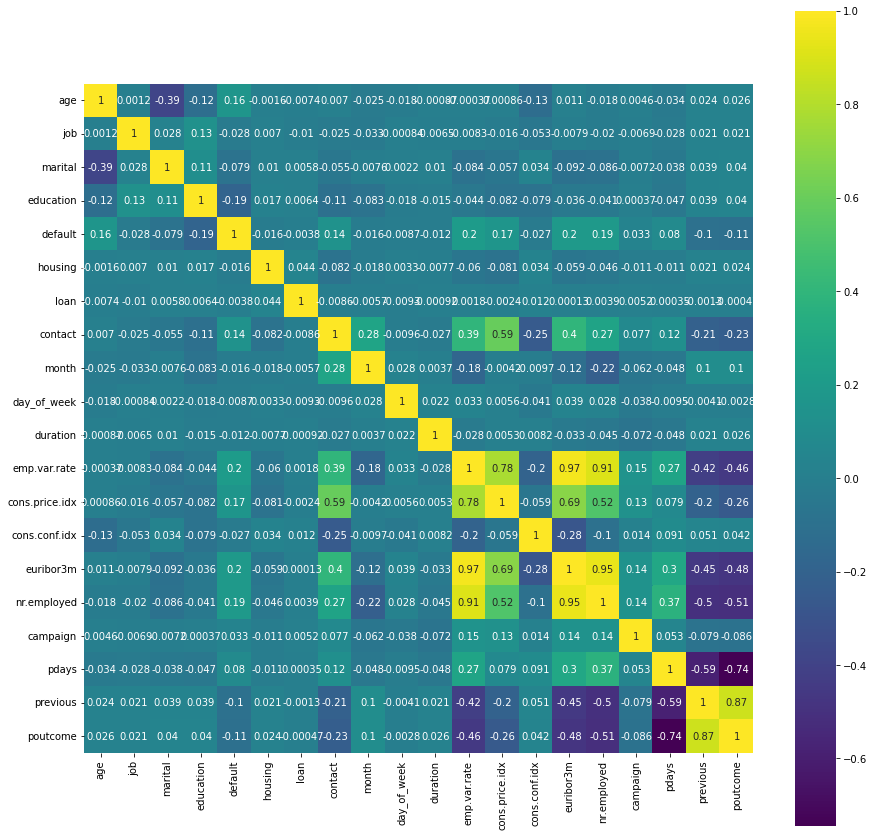

In [ ]:
correlation = bank_final.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.23412551, 0.09226802, 0.07521023, 0.06633088, 0.05869395,
       0.05414519, 0.05154654, 0.04955231, 0.04791995, 0.04661241,
       0.04590211, 0.04379228, 0.03734089, 0.02987791, 0.02773469,
       0.01970532, 0.01337648, 0.00449866, 0.0010179 , 0.00034877])

In [ ]:
explained_variance

array([0.23412551, 0.09226802, 0.07521023, 0.06633088, 0.05869395,
       0.05414519, 0.05154654, 0.04955231, 0.04791995, 0.04661241,
       0.04590211, 0.04379228, 0.03734089, 0.02987791, 0.02773469,
       0.01970532, 0.01337648, 0.00449866, 0.0010179 , 0.00034877])

In [ ]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = bank_final.columns
vif_data["VIF"] = [variance_inflation_factor(bank_final.values, i) for i in range(len(bank_final.columns))]

In [ ]:
vif_data

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',probability=True)
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

[[6921  152]
 [ 586  341]]
91.0


In [ ]:
from sklearn.metrics import classification_report

print('SVM Resultado\n',classification_report(y_test, svcpred))

SVM Resultado
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7073
           1       0.69      0.37      0.48       927

    accuracy                           0.91      8000
   macro avg       0.81      0.67      0.71      8000
weighted avg       0.90      0.91      0.90      8000



In [ ]:
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy'))

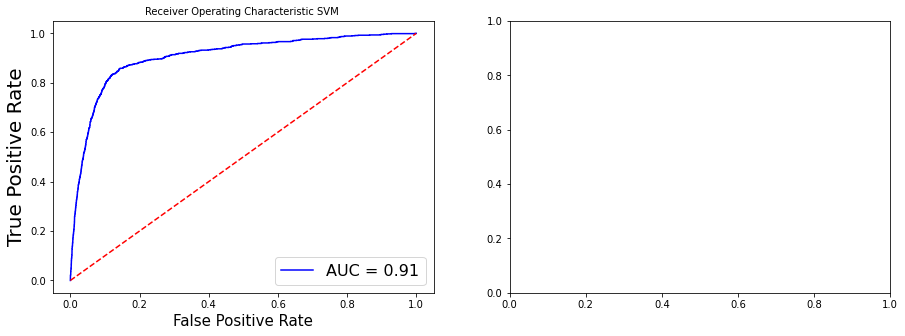

In [ ]:
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = svc.predict_proba(X_test)
preds = probs[:,1]
fprsvc, tprsvc, thresholdsvc = metrics.roc_curve(y_test, preds)
roc_aucsvc = metrics.auc(fprsvc, tprsvc)

ax.plot(fprsvc, tprsvc, 'b', label = 'AUC = %0.2f' % roc_aucsvc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6518  555]
 [ 582  345]]
86.0


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6922  151]
 [ 643  284]]
90.0


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
#KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6962  111]
 [ 684  243]]
90.0
